In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics

# Analysis of genes conservativity with expression data and LOEUF per transcript

- [Dividing into groups according to AC/N_range and LOEUF parameters](#part1)
- [Gene filtration](#part2)
- [Example of genes](#part3)
- [Collecting information about selected genes using strong boundaries](#part4)

In [2]:
genes_data = pd.read_csv('../data/all_genes_analysis.tsv', 
                         sep='\t').sort_values(by='AC/N_range', ascending=False) 
genes_data

,Gene_name,AC/N_min,AC/N_max,AC/N_range,LOEUF,Max_median_expression,range_group_custom,range_group_loeuf
1992,CFLAR,0.037736,18373.200000,486889.800000,0.173,4.9175,3,0
5012,ARHGAP26,0.444444,96834.500000,217877.625000,0.276,1.2600,3,0
17988,KRTAP19-6,104120.000000,104120.000000,104120.000000,NaN,0.0000,3,1
14606,FTSJ3,0.714286,70413.363636,98578.709091,0.412,0.2500,3,1
14607,ALDH3A2,0.642202,52503.437500,81755.352679,0.825,3.7125,1,2
...,...,...,...,...,...,...,...,...
12271,ANKRD52,0.185185,0.185185,0.185185,0.090,17.4000,2,0
7814,ENSG00000288634,0.136364,0.136364,0.136364,NaN,NaN,2,1
17451,MBD3L4,0.125000,0.125000,0.125000,1.885,0.0000,2,2
9962,SMNDC1,0.122951,0.122951,0.122951,0.529,8.4200,2,1


## <a id='part1'>Dividing into groups according to AC/N_range and LOEUF parameters</a>

In [3]:
range_values = genes_data['AC/N_range']

q1 = np.percentile(range_values, 33.33)
median = np.percentile(range_values, 66.67)
q3 = np.percentile(range_values, 100)

print(f'Thresholds: lower - {q1}, and upper - {q3}. Median - {median}')

Thresholds: lower - 1.5435999039562631, and upper - 486889.8000000001. Median - 3.811976470588236


In [4]:
def define_group_range(range):
    if range <= q1 and range > 1: # all transcripts are very similar (AC/N both small and large), AC/N for each transcript >= 1
        return 0
    elif range >= q3: # The gene exhibits a substantial variation in the presence of AC and N in loss-of-function variants across various transcripts.
        return 3
    elif range < 1:
        return 2      # few transcripts, all N > AC
    else:
        return 1 # All transcripts of the gene exhibit an AC/N ratio greater than or equal to 1.

def define_group_loeuf(range):
    if range == None:
        return None
    if range < 0.35:
        return 0 # the gene highly LoF intolerant 
    elif range > 0.75:
        return 2 # the gene is LoF tolerant
    else:
        return 1 # the gene is moderately LoF tolerant

In [5]:
genes_data['range_group_custom'] = genes_data['AC/N_range'].apply(define_group_range)
genes_data['range_group_custom'] = genes_data['range_group_custom'].astype('category')

genes_data['range_group_loeuf'] = genes_data['LOEUF'].apply(define_group_loeuf)
genes_data['range_group_loeuf'] = genes_data['range_group_loeuf'].astype('category')
genes_data

,Gene_name,AC/N_min,AC/N_max,AC/N_range,LOEUF,Max_median_expression,range_group_custom,range_group_loeuf
1992,CFLAR,0.037736,18373.200000,486889.800000,0.173,4.9175,3,0
5012,ARHGAP26,0.444444,96834.500000,217877.625000,0.276,1.2600,1,0
17988,KRTAP19-6,104120.000000,104120.000000,104120.000000,NaN,0.0000,1,1
14606,FTSJ3,0.714286,70413.363636,98578.709091,0.412,0.2500,1,1
14607,ALDH3A2,0.642202,52503.437500,81755.352679,0.825,3.7125,1,2
...,...,...,...,...,...,...,...,...
12271,ANKRD52,0.185185,0.185185,0.185185,0.090,17.4000,2,0
7814,ENSG00000288634,0.136364,0.136364,0.136364,NaN,NaN,2,1
17451,MBD3L4,0.125000,0.125000,0.125000,1.885,0.0000,2,2
9962,SMNDC1,0.122951,0.122951,0.122951,0.529,8.4200,2,1


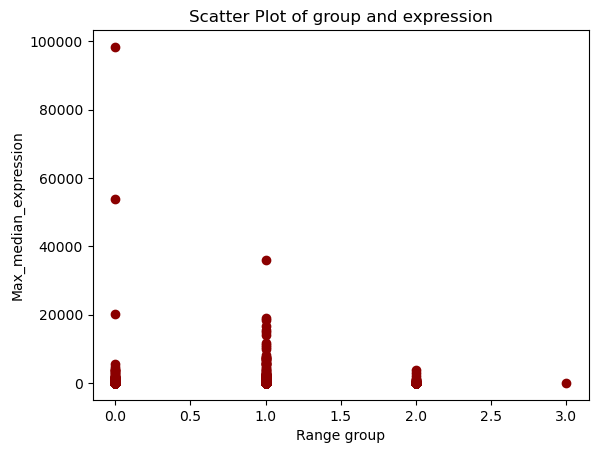

In [6]:
plt.scatter(genes_data['range_group_custom'], genes_data['Max_median_expression'], color = 'darkred')
plt.xlabel('Range group')
plt.ylabel('Max_median_expression')
plt.title('Scatter Plot of group and expression')
plt.show()

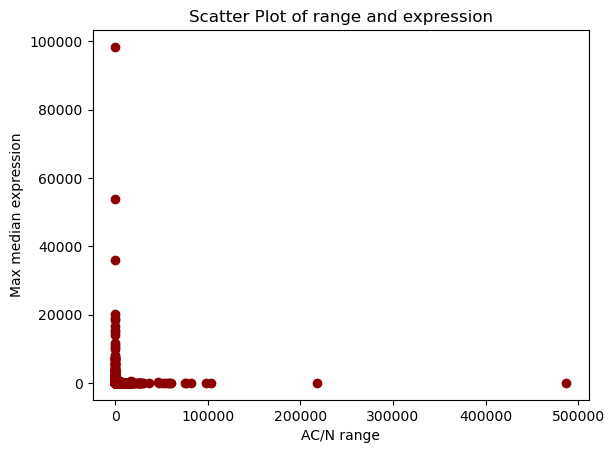

In [7]:
plt.scatter(genes_data['AC/N_range'], genes_data['Max_median_expression'], color = 'darkred')
plt.xlabel('AC/N range')
plt.ylabel('Max median expression')
plt.title('Scatter Plot of range and expression')
plt.show()

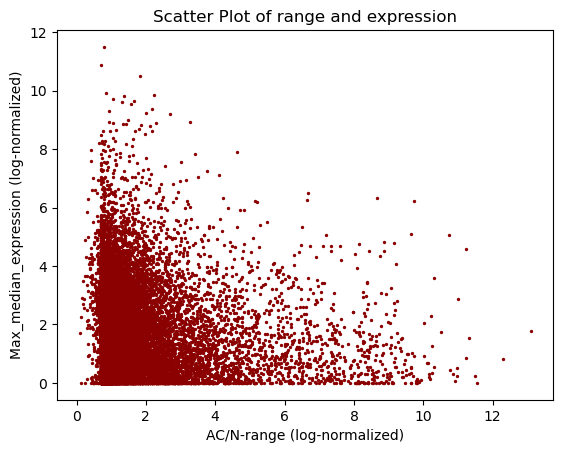

In [8]:
plt.scatter(np.log1p(genes_data['AC/N_range']), np.log1p(genes_data['Max_median_expression']), s=2, color = 'darkred')
plt.xlabel('AC/N-range (log-normalized)')
plt.ylabel('Max_median_expression (log-normalized)')
plt.title('Scatter Plot of range and expression')
#plt.savefig('../data/plots/AC_N_range_and_expression.png', bbox_inches='tight')
plt.show()

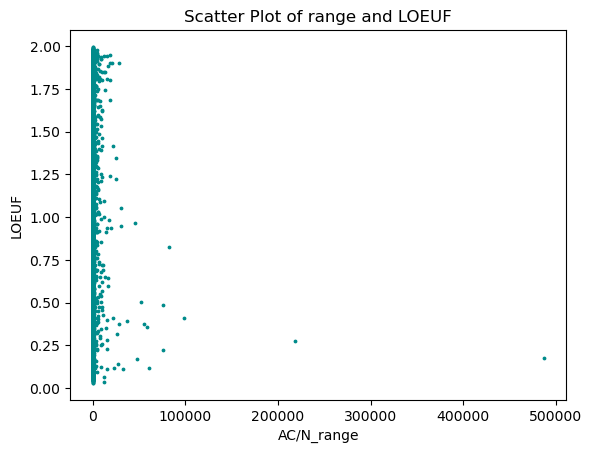

In [9]:
plt.scatter(genes_data['AC/N_range'], genes_data['LOEUF'], s=3, color = 'darkcyan')
plt.xlabel('AC/N_range')
plt.ylabel('LOEUF')
plt.title('Scatter Plot of range and LOEUF')
#plt.savefig('../data/plots/AC_N_range_and_LOEUF.png', bbox_inches='tight')
plt.show()

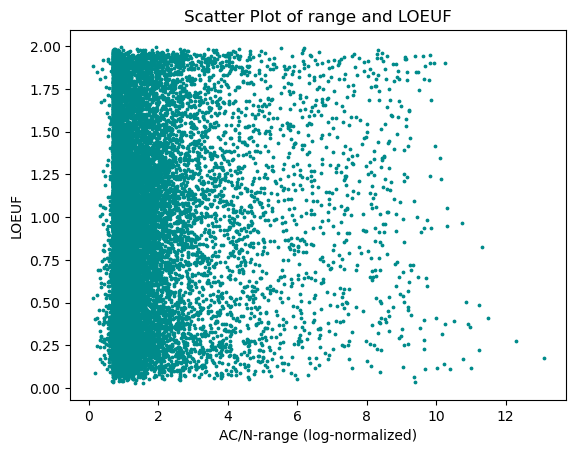

In [10]:
plt.scatter(np.log1p(genes_data['AC/N_range']), genes_data['LOEUF'], s=3, color = 'darkcyan')
plt.xlabel('AC/N-range (log-normalized)')
plt.ylabel('LOEUF')
plt.title('Scatter Plot of range and LOEUF')
#plt.savefig('../data/plots/AC_N_range_and_LOEUF_norm.png', bbox_inches='tight')
plt.show()

## <a id='part2'>Gene filtration</a>

For further analysis, the decision was made to focus on genes exhibiting a **wide range of AC/N values**, with **LOEUF ≤ 0.75**, while ensuring **consistent expression** levels

In [11]:
filtered_genes = genes_data.loc[
    (np.log1p(genes_data['AC/N_range']) >= 3) &
    (np.log1p(genes_data['Max_median_expression']) >= 1.5) &
    (genes_data['LOEUF'] <= 0.75)]
filtered_genes.reset_index(drop=True, inplace=True)
filtered_genes

,Gene_name,AC/N_min,AC/N_max,AC/N_range,LOEUF,Max_median_expression,range_group_custom,range_group_loeuf
0,CFLAR,0.037736,18373.200000,486889.800000,0.173,4.9175,3,0
1,TPT1,1.000000,76186.454545,76186.454545,0.485,97.1000,1,1
2,SON,7.536585,455935.000000,60496.229773,0.118,16.5175,1,0
3,FOXN4,0.897059,32720.800000,36475.645902,0.395,4.8000,1,1
4,ATXN2L,0.800000,21947.680000,27434.600000,0.143,8.9100,1,0
...,...,...,...,...,...,...,...,...
224,YBX1,2.037037,41.000000,20.127273,0.349,45.4100,1,0
225,RNF166,0.613208,12.250000,19.976923,0.614,13.8000,1,1
226,UBE4B,1.000000,19.925000,19.925000,0.157,5.6700,1,0
227,HNRNPD,1.090909,21.600000,19.800000,0.227,5.5075,1,0


This resulted in **229** genes that satisfied these boundary conditions. 

## <a id='part3'>Example of genes</a>

In [12]:
filtered_genes_example = genes_data.loc[
    (np.log1p(genes_data['AC/N_range']) >= 6) &
    (np.log1p(genes_data['Max_median_expression']) >= 1.5) &
    (genes_data['LOEUF'] <= 0.3)]
filtered_genes_example.reset_index(drop=True, inplace=True)
filtered_genes_example

,Gene_name,AC/N_min,AC/N_max,AC/N_range,LOEUF,Max_median_expression,range_group_custom,range_group_loeuf
0,CFLAR,0.037736,18373.200000,486889.800000,0.173,4.9175,3,0
1,SON,7.536585,455935.000000,60496.229773,0.118,16.5175,1,0
2,ATXN2L,0.800000,21947.680000,27434.600000,0.143,8.9100,1,0
3,CDH2,0.750000,5661.217391,7548.289855,0.290,20.2050,1,0
4,UBR4,0.782609,3402.603175,4347.770723,0.095,11.5400,1,0
5,RAD23B,1.200000,4793.166667,3994.305556,0.227,10.0550,1,0
6,USF2,1.041667,3828.950000,3675.792000,0.249,7.0500,1,0
7,SPI1,1.090909,1699.416667,1557.798611,0.244,91.5000,1,0
8,CSNK1G2,0.259259,374.100000,1442.957143,0.254,3.5000,1,0
9,SCAF11,0.526316,526.692308,1000.715385,0.193,3.8800,1,0


## <a id='part4'>Collecting information about selected genes using strong boundaries</a>

In [13]:
genes_names = list(filtered_genes_example['Gene_name'])
files_names = []
for gene in genes_names:
    files_names.append(f'/home/bioinf/gnomad-variants/Grishchenko/processed_data/tables/ac_expression_tables/gene_examples/{gene}.tsv')

In [14]:
from data_processing_functions import info_collecting, info_filtering

In [15]:
all_gene_dataframe = info_collecting(files_names)

In [16]:
all_gene_dataframe

,CHROM,POS,ID,REF,ALT,AC,AC_afr,AC_amr,AC_nfe,AC_asj,...,BIOTYPE,EXON,INTRON,ALLELE_NUM,VARIANT_CLASS,CANONICAL,LoF,LoF_filter,LoF_flags,LoF_info
0,chr2,201116564,NaN,G,A,1,0,0,0,0,...,protein_coding,NaN,1/9,1,SNV,YES,NaN,NaN,NaN,NaN
1,chr2,201116564,NaN,G,A,1,0,0,0,0,...,protein_coding,NaN,1/5,1,SNV,NaN,NaN,NaN,NaN,NaN
2,chr2,201116564,NaN,G,A,1,0,0,0,0,...,protein_coding,NaN,1/7,1,SNV,NaN,NaN,NaN,NaN,NaN
3,chr2,201116564,NaN,G,A,1,0,0,0,0,...,protein_coding,NaN,1/8,1,SNV,NaN,NaN,NaN,NaN,NaN
4,chr2,201116564,NaN,G,A,1,0,0,0,0,...,protein_coding,NaN,1/4,1,SNV,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2690672,chr6,34426089,rs78454682,G,A,13,0,0,10,0,...,protein_coding,NaN,NaN,1,SNV,NaN,NaN,NaN,NaN,NaN
2690673,chr6,34426089,rs78454682,G,A,13,0,0,10,0,...,protein_coding,NaN,NaN,1,SNV,YES,NaN,NaN,NaN,NaN
2690674,chr6,34426089,rs78454682,G,A,13,0,0,10,0,...,protein_coding,NaN,NaN,1,SNV,YES,NaN,NaN,NaN,NaN
2690675,chr6,34426089,rs78454682,G,A,13,0,0,10,0,...,protein_coding,NaN,NaN,1,SNV,NaN,NaN,NaN,NaN,NaN


In [17]:
constraint_file = '/home/bioinf/gnomad-variants/raw_data/plof_metrics/gnomad.v4.1.constraint_metrics.tsv'
expression_file = '../data/max_tissue_median_expr.tsv'
final_transcipt_data = info_filtering(all_gene_dataframe, constraint_file, expression_file)
final_transcipt_data

/home/bioinf/gnomad-variants/Grishchenko/BI_project_2024/transcript_conservativity/code/data_processing_functions.py:66: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gene_data = gene_data[


,Transcript_ID,AC,AC_afr,AC_amr,AC_nfe,AC_asj,AC_sas,AC_eas,AC_mid,AC_fin,Gene_name,Gene_id,Variant,Max_AC_in_transcript,Consequence_of_max_AC,AC/Variant,LOEUF_transcript,Exon_number,Max_median_expression
0,ENST00000222305,49,1,0,34,1,2,2,0,7,USF2,ENSG00000105698,36,12,frameshift_variant,1.361111,0.710,10.0,106.75
1,ENST00000227163,12,0,0,7,0,2,0,0,2,SPI1,ENSG00000066336,11,3,frameshift_variant,1.090909,0.349,5.0,91.50
2,ENST00000255641,125,3,2,109,1,2,4,0,2,CSNK1G2,ENSG00000133275,57,93,stop_gained,2.192982,0.477,11.0,105.10
3,ENST00000264546,69,3,3,50,1,3,0,0,5,FRMD4A,ENSG00000151474,124,7,stop_gained,0.556452,0.689,17.0,0.70
4,ENST00000266589,35,2,0,25,1,3,0,0,0,SCAF11,ENSG00000139218,30,8,splice_donor_variant,1.166667,1.445,5.0,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,ENST00000649423,3,0,0,2,0,0,0,0,0,FRMD4A,ENSG00000151474,1,3,stop_gained,3.000000,NaN,NaN,NaN
110,ENST00000649947,3,0,0,2,0,0,0,0,0,FRMD4A,ENSG00000151474,1,3,stop_gained,3.000000,NaN,NaN,NaN
111,ENST00000650137,4,0,0,3,0,0,0,0,1,FRMD4A,ENSG00000151474,3,2,frameshift_variant,1.333333,NaN,NaN,NaN
112,ENST00000675173,18,1,1,9,2,2,0,0,0,CDH2,ENSG00000170558,24,2,stop_gained,0.750000,0.527,7.0,NaN


In [18]:
final_transcipt_data.to_csv('../data/example_genes_transcripts.tsv', sep='\t', index=False)